----------------------------------------------

*   **Name** : Nehalkumar Laxmanbhai Jesadiya
*   **Student ID** : C0793769
*   **Final Assignment of AML 2103 Visualization for AI and ML**

--------------------------------------------------------

So by now we know how to convert a word/token into number and from number back to token! 

1.   Make a sentence tagger with sbert or SVM or any other classifier you know.
2.   Use 30 sentences to classify 30 sentences into two groups.
3.   Use decision tree to classify the token ids, and make a decision tree to explain the decision making process, and the way how the 30 sentences are classified/predicted into two classes (A or B).
4.   Visualize the decision tree
*   Actually, the decision tree would say the reasons (the words/tokens) that redirect your classifier to consider the test sentence in class A or in class B!
*   With decision tree we are going to explain the behavior of the classifier model.
*   Example of sentence classification/tagging: https://colab.research.google.com/drive/1abAsDSiP1faPTAzFYxQ1u2wzsKIKgkTS?usp=sharing

You SHOULD narrate your decision tree and explain with a lot of details your decision tree and results. For example, here we discovered that the key word "auto" is used to determine if a sentence is about car.

Maybe you find out that your model does not work properly! No worries! Just explain your analysis why the model does not work or why the results are not promising in that case.

Further information is available here: https://colab.research.google.com/drive/1AD7_Q1g5T8KNv3VQ0ZD7-OtRXCNMaUl6#scrollTo=hRPIcMomQbWC

So I am expecting a colab file of code with many text and visualizations, and you need to justify your work to receive a good mark.

Send me the link to you colab file either through online text or copy and paste it inside a text file and upload your text file.

Submit to both data visualization and nlp moodle.

--------------------------------------------------------

In [ ]:
# To define total 30 sentences in a single list. In the given list I have added with two different categories.
# Which are Computer and Tree. Sentences of both categories are added alternatively into the list(sen_list).
sen_list = ["The computer screen before him was blank, but he didn't notice",
            "A tree is a perennial plant with an elongated stem, or trunk, supporting branches and leaves in most species",
            "Nowadays the computer has become very sophisticated and it can be put to various uses",
            "The definition of a tree may be narrower, including only wood plants with secondary growth, plants that are usable as lumber or plants above a specified height.",
            "The computer is a substitute for the human brain",
            "Trees are significant for life on earth and, without trees, the earth will get dead and dry.",
            "The invention of the computer is one of the greatest advances in modern technology",
            "Flying creatures have their homes on trees",
            "Every computer has a language of its own",
            "Trees are God’s most prominent blessing to life on earth",
            "Each type of computer is used for perform specific functions respectively",
            "Imagine what is going to happen if there are no trees", 
            "This is the Era of computer, one can not live without computer",
            "Most of the people of our country do not understand the importance of planning trees",  
            "Computer is the widely used electronic device",
            "Tree plantation means planting new trees",  
            "People prefer using free time in front of computers or laptops instead of communicating with family members and relatives",
            "Trees are important to us in a lot of ways and we cannot ignore their importance",  
            "There are three main types of this electronic device, namely Analog computers, Digital computers and Hybrid Computers",
            "It is the responsibility of each one of us to preserve and protect trees, and even plant more and more",  
            "Computer has become like a family member",
            "Trees play an important role in our life",  
            "The use of digital devices has a considerable negative effect on a students’ academic performance due to being distracted",
            "Trees protect us from inclement wind also", 
            "There is hardly any place where computers are not used",
            "Trees and plants are the sources of many supply life-saving drugs", 
            "The most important use of computers is the storage of information",
            "Trees release oxygen which we need for our life and, they also absorb the carbon-dioxide.",
            "The word computer is taken from word compute means to calculate and count",
            "Trees are beautiful and useful gifts of nature"]


# Here, I have added sentences of Computer and Tree repeatedly. So, every odd index has computer sentence while tree senteances on even index.
print("Total sentences in the sen_list: ", len(sen_list))

Total sentences in the sen_list:  30


In [ ]:
# Here, I have stored category of sentences repeatedly inth the list 'sen_cat_list'. 
# So, every odd index has computer category while tree category on even index.
sen_cat_list = ['Computer' if i%2 == 0 else 'Tree' for i in range(0, 30)]
print(sen_cat_list)

['Computer', 'Tree', 'Computer', 'Tree', 'Computer', 'Tree', 'Computer', 'Tree', 'Computer', 'Tree', 'Computer', 'Tree', 'Computer', 'Tree', 'Computer', 'Tree', 'Computer', 'Tree', 'Computer', 'Tree', 'Computer', 'Tree', 'Computer', 'Tree', 'Computer', 'Tree', 'Computer', 'Tree', 'Computer', 'Tree']


In [ ]:
# To install required libraries into Colab enviroment.
!pip install transformers[torch]==4.3
!pip install sentencepiece
!pip install sentence_transformers
# Imported libtaries uesd for providinng more weight to important feature to 
# perticular feature of dataset. 

In [ ]:
# Importing required pakages.
import numpy as np
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

In [ ]:
# Before performing Tokeniztion.
# Let's perform Data Cleaning steps.
# This block of code will remove stopwords from each sentences.
stopwords_lst = set(stopwords.words('english'))
sent_wo_stopword = []
for sent in sen_list:
    wo_stopword = ''
    for word in sent.split():
        if word not in stopwords_lst:
            wo_stopword += word.lower() + ' '
    sent_wo_stopword.append(wo_stopword.rstrip(' '))
sent_wo_stopword

['the computer screen blank, notice',
 'a tree perennial plant elongated stem, trunk, supporting branches leaves species',
 'nowadays computer become sophisticated put various uses',
 'the definition tree may narrower, including wood plants secondary growth, plants usable lumber plants specified height.',
 'the computer substitute human brain',
 'trees significant life earth and, without trees, earth get dead dry.',
 'the invention computer one greatest advances modern technology',
 'flying creatures homes trees',
 'every computer language',
 'trees god’s prominent blessing life earth',
 'each type computer used perform specific functions respectively',
 'imagine going happen trees',
 'this era computer, one live without computer',
 'most people country understand importance planning trees',
 'computer widely used electronic device',
 'tree plantation means planting new trees',
 'people prefer using free time front computers laptops instead communicating family members relatives',
 'tr

In [ ]:
# This block of code will remove all punctuations from each sentences.
sent_wo_punct = [
                 sent.translate(str.maketrans("","", string.punctuation)) 
                 for sent in sent_wo_stopword
                 ]
sent_wo_punct

['the computer screen blank notice',
 'a tree perennial plant elongated stem trunk supporting branches leaves species',
 'nowadays computer become sophisticated put various uses',
 'the definition tree may narrower including wood plants secondary growth plants usable lumber plants specified height',
 'the computer substitute human brain',
 'trees significant life earth and without trees earth get dead dry',
 'the invention computer one greatest advances modern technology',
 'flying creatures homes trees',
 'every computer language',
 'trees god’s prominent blessing life earth',
 'each type computer used perform specific functions respectively',
 'imagine going happen trees',
 'this era computer one live without computer',
 'most people country understand importance planning trees',
 'computer widely used electronic device',
 'tree plantation means planting new trees',
 'people prefer using free time front computers laptops instead communicating family members relatives',
 'trees import

In [ ]:
# To store preprocessed text into sen_list
# Just for simplisity of the code
sen_list = sent_wo_punct

In [ ]:
my_tokenizer = T5Tokenizer.from_pretrained('t5-small')
# 't5-small' is pre-trained model, Here I have used transfer learning technoque to perform sentence tokenisation.
# It is powerfull model for tokenizing the given text.


sen_tokenized = [my_tokenizer.encode(sen_list[sen], return_tensors="pt").cpu().data.numpy() for sen in range(0, len(sen_list))]
# Here, 'encode' method of 'my_tokenizer' object converts text token into numerical values.
# Because, data should be in numarical values in order to train and test machine learning model.
# return_tensors="pt" is convert list of encoded token to tensor.
# 'cpu().data.numpy()' will help to convert tensor to numpy array.

In [ ]:
# Tokenized and Encoded first sentence of 'sen_list'
sen_tokenized[0][0]

array([    8,  1218,  1641, 11460,  2103,     1])

In [ ]:
# Decoded first array of 'sen_tokenized'
print('Coverted Tokenized to original sentence: \n', my_tokenizer.decode(sen_tokenized[0][0]))

# Here, I have used 'decode' method of 'my_tokenizer' object to check tokenized 
# sentence is right oe not.

Coverted Tokenized to original sentence: 
 the computer screen blank notice</s>


In [ ]:
# To print original sentence.
print('Original sentence: \n', sen_list[0])

Original sentence: 
 the computer screen blank notice


In [ ]:
# Let's find lenth of each arrays in 'sen_tokenized'.
# Because lenth of each arrays must be same to train machine learning model.
for token in sen_tokenized:
    print(len(token[0]), end = ', ')

# Here, We can see that length of each array is different.
# So, I need to make same lenth for each arrays.

6, 16, 8, 19, 6, 12, 9, 5, 4, 9, 9, 5, 9, 8, 6, 8, 15, 9, 15, 10, 6, 6, 14, 9, 7, 9, 7, 14, 10, 6, 

In [ ]:
# I have created maxtrix with all zeros and named 'updated_sen_tokenized'. 
updated_sen_tokenized = np.zeros((len(sen_cat_list), max([len(i[-1]) for i in sen_tokenized])))
print('Shape of updated_sen_tokenized: ', np.shape(updated_sen_tokenized))

Shape of updated_sen_tokenized:  (30, 19)


In [ ]:
# Now I will replace original value with zero in updated_sen_tokenized metrix.
# So updated_sen_tokenized will has same lenght arrays.
for i in range(0, len(sen_tokenized)):
  current_item = np.array(sen_tokenized[i][0])
  for ii in range(0, current_item.shape[0]):
    updated_sen_tokenized[i,ii] = current_item[ii]
updated_sen_tokenized

array([[8.0000e+00, 1.2180e+03, 1.6410e+03, 1.1460e+04, 2.1030e+03,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [3.0000e+00, 9.0000e+00, 2.1950e+03, 2.4999e+04, 1.4750e+03,
        3.0000e+00, 1.5000e+01, 2.9610e+03, 9.2000e+02, 6.2690e+03,
        1.7041e+04, 3.9560e+03, 9.6780e+03, 3.2310e+03, 3.2440e+03,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [1.8811e+04, 1.2180e+03, 5.8200e+02, 8.7320e+03, 4.7400e+02,
        7.9600e+02, 2.2840e+03, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
       [8.0000e+00, 4.9030e+03, 2.1950e+03, 1.6400e+02, 5.6580e+03,
        4.9000e+01, 3.7900e+02, 1.6790e+03, 2.6770e+03, 6.9800e+03,
        1.1700e+03, 2.6770e+03, 1.7800e+02, 1.7900e+02, 2.6467e+04,
        2.677

In [ ]:
# Let's find lenth of each arrays in 'updated_sen_tokenized'.
# Because lenth of each arrays must be same to train machine learning model.
# Here, each array are considered as row for input dataset.
for token in updated_sen_tokenized:
    print(len(token), end = ', ')

# Here, We can see that length of each array is same which is 19.
# So, It is suitable of classification model.

19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 

In [ ]:
# To import 'DecisionTreeClassifier' model which helps to classify category of given sentence.
from sklearn.tree import DecisionTreeClassifier

# To import 'train_test_split' for splitting dataset for training and testing.
from sklearn.model_selection import train_test_split

# To import 'classification_report' and 'confusion_matrix' for finding accuracy of 'DecisionTreeClassifier'.
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# To import graphviz and tree library to visulize our Decision Tree classifier.
import graphviz 
from sklearn import tree

In [ ]:
# Here I have splitted data set in 20% for testing and 80% for training.
# I will use 'X_test' and 'Y_test' for test performance of 'DecisionTreeClassifier'.
X_train, X_test, Y_train, Y_test = train_test_split(updated_sen_tokenized, sen_cat_list, test_size = 0.2)

Accuracy of DecisionTreeClassifier with depth of tree is 1 : 50.0%


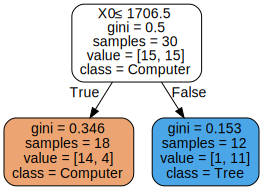

In [ ]:
# I have defined 'DecisionTreeClassifier' classifier with 'max_depth = 1',
# Which is minimum depth value for 'DecisionTreeClassifier'
my_decision_tree_dp1 = DecisionTreeClassifier(max_depth = 1)

# Model will be trained by 'updated_sen_tokenized' and 'sen_cat_list'.
my_decision_tree_dp1.fit(updated_sen_tokenized, sen_cat_list)


# To get accuracy of 'DecisionTreeClassifier' with 1 depth tree.
my_decision_tree_dp1.predict(updated_sen_tokenized)
print('Accuracy of DecisionTreeClassifier with depth of tree is {} : {}%'.format(
    my_decision_tree_dp1.max_depth, round(my_decision_tree_dp1.score(X_test, Y_test), 2) * 100))

# To generate decision tree for trained 'DecisionTreeClassifier' for 1 depth.
dot_data = tree.export_graphviz(my_decision_tree_dp1, out_file=None,
                                class_names = sen_cat_list, filled=True,
                                rounded=True, special_characters=True, rotate=False) 

graph = graphviz.Source(dot_data)
graph.render("Gini")
graph

Explanation about GINI value. 
- GINI value indicates that wrongly identified class value for other class. 
- For Example, If gini value of Class A is 0.30, means Class A is wrongly identified by Classifier with 30%. While 70% identified that class Truely. 
- So We need to set parameters of classisfier till gini value 0.0

-----------------------------

- Here, I have tried depth value of Decision tree 1 to 5.
- When I was fitting DecisionTreeClassifier with 1 depth, I got accuracy of model is 50.0%.
- Which is not good for any model.
- If we look on Dicision Tree, in leaf node I am getting 18 samples for computer class, while 12 samples for Tree class. It is identified that depth 1 is not sufficiant for practical use.
- Also, If we look on gini value, It indicates how perticular class will be classified as wrong class. So, gini value for leaf node of Computer is 0.346 and for Tree class is 0.153. So, We need to increase depth of three till 0 value of both classes' gini value.
- Here, we have total 15 sentences for Computer class, while 15 sentences for Tree class.
- I tried to model with 2 depth.

Accuracy of DecisionTreeClassifier with depth of tree is 2 : 83.0%


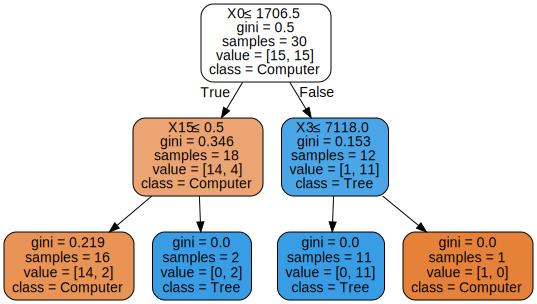

In [ ]:
# I have defined 'DecisionTreeClassifier' classifier with 'max_depth = 2',
# 
my_decision_tree_dt2 = DecisionTreeClassifier(max_depth = 2)

# Model will be trained by 'updated_sen_tokenized' and 'sen_cat_list'.
my_decision_tree_dt2.fit(updated_sen_tokenized, sen_cat_list)

my_decision_tree_dt2.predict(updated_sen_tokenized)
print('Accuracy of DecisionTreeClassifier with depth of tree is {} : {}%'.format(
    my_decision_tree_dt2.max_depth, round(my_decision_tree_dt2.score(X_test, Y_test), 2) * 100))

dot_data = tree.export_graphviz(my_decision_tree_dt2, out_file=None,
                                class_names = sen_cat_list, filled=True,
                                rounded=True, special_characters=True, rotate=False) 

graph = graphviz.Source(dot_data)
graph.render("Gini")
graph

- Here, I have tried depth value of Decision tree with 2. 
- When I was fitting DecisionTreeClassifier with 2 depth, I got accuracy of model is 83.0%.
- Which is not good for any model.
- If we look on Dicision Tree, in leaf node I am getting total 17 samples for computer class, while 
13 samples for Tree class. It is indicated that depth 2 is not sufficiant for practical use.
- Also gini value of all leaf nodes is not zero.
- So, I needed to increase depth value of tree with 3.

Accuracy of DecisionTreeClassifier with depth of tree is 3 : 100.0%


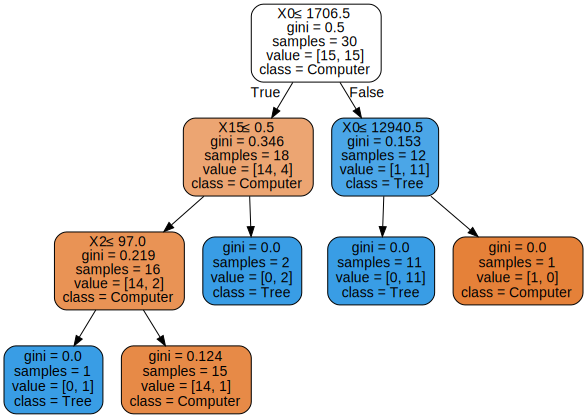

In [ ]:
# I have defined 'DecisionTreeClassifier' classifier with 'max_depth = 3',
# 
my_decision_tree_dt3 = DecisionTreeClassifier(max_depth = 3)

# Model will be trained by 'updated_sen_tokenized' and 'sen_cat_list'.
my_decision_tree_dt3.fit(updated_sen_tokenized, sen_cat_list)

my_decision_tree_dt3.predict(updated_sen_tokenized)
print('Accuracy of DecisionTreeClassifier with depth of tree is {} : {}%'.format(
    my_decision_tree_dt3.max_depth, round(my_decision_tree_dt3.score(X_test, Y_test), 2) * 100))

dot_data = tree.export_graphviz(my_decision_tree_dt3, out_file=None,
                                class_names = sen_cat_list, filled=True,
                                rounded=True, special_characters=True, rotate=False)

graph = graphviz.Source(dot_data)
graph.render("Gini")
graph

- Here, I have tried depth value of Decision tree with 3. 
- When I was fitting DecisionTreeClassifier with 3 depth, I got accuracy of model is 100.0%.
- Which is acceptable for any model, but gini value os not zero, so it is not useful for real world.
- If we look on Dicision Tree, in leaf node I am getting total 16 samples for computer class, while 14 samples for Tree class. It is indicated that depth 3 is not sufficiant for practical use.
- But increament of depth of tree, it is increasing true value for each classes.
- Also gini value of all leaf nodes is not zero.
- So, I needed to increase depth value of tree with 4.

Accuracy of DecisionTreeClassifier with depth of tree is 4 : 100.0%


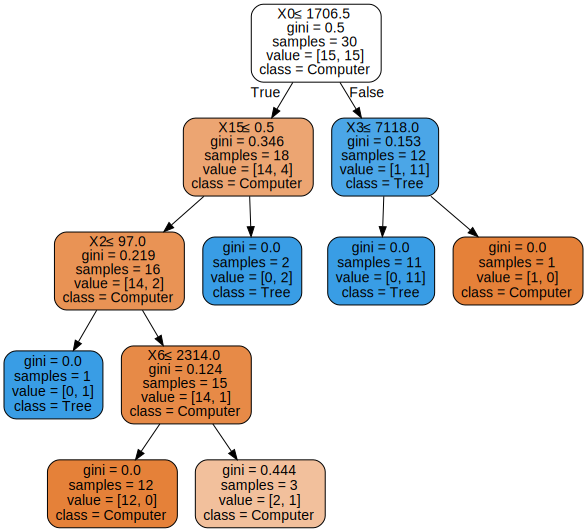

In [ ]:
# I have defined 'DecisionTreeClassifier' classifier with 'max_depth = 4',
# 
my_decision_tree_dt4 = DecisionTreeClassifier(max_depth = 4)

# Model will be trained by 'updated_sen_tokenized' and 'sen_cat_list'.
my_decision_tree_dt4.fit(updated_sen_tokenized, sen_cat_list)

my_decision_tree_dt4.predict(updated_sen_tokenized)
print('Accuracy of DecisionTreeClassifier with depth of tree is {} : {}%'.format(
    my_decision_tree_dt4.max_depth, round(my_decision_tree_dt4.score(X_test, Y_test), 2) * 100))

dot_data = tree.export_graphviz(my_decision_tree_dt4, out_file=None,
                                class_names = sen_cat_list, filled=True,
                                rounded=True, special_characters=True, rotate=False)

graph = graphviz.Source(dot_data)
graph.render("Gini")
graph

- Here, I have tried depth value of Decision tree with 4. 
- When I was fitting DecisionTreeClassifier with 4 depth, I got accuracy of model is 100.0%.
- Which is acceptable for any model, but gini value os not zero, so it is not useful for real world.
- If we look on Dicision Tree, in leaf node I am getting total 16 samples for computer class, while 14 samples for Tree class. It is indicated that depth 3 is not sufficiant for practical use.
- But increament of depth of tree, it is increasing true value for each classes.
- Also gini value of all leaf nodes is not zero.
- So, I needed to increase depth value of tree with 5.

Accuracy of DecisionTreeClassifier with depth of tree is 5 : 100.0%


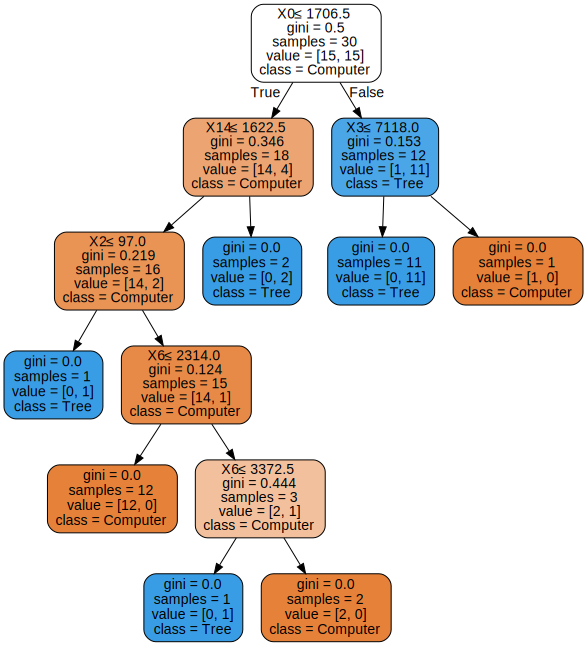

In [ ]:
# I have defined 'DecisionTreeClassifier' classifier with 'max_depth = 5',
# 
my_decision_tree_dt5 = DecisionTreeClassifier(max_depth = 5)

# Model will be trained by 'updated_sen_tokenized' and 'sen_cat_list'.
my_decision_tree_dt5.fit(updated_sen_tokenized, sen_cat_list)

my_decision_tree_dt5.predict(updated_sen_tokenized)
print('Accuracy of DecisionTreeClassifier with depth of tree is {} : {}%'.format(
    my_decision_tree_dt5.max_depth, round(my_decision_tree_dt5.score(X_test, Y_test), 2) * 100))

dot_data = tree.export_graphviz(my_decision_tree_dt5, out_file=None,
                                class_names = sen_cat_list, filled=True,
                                rounded=True, special_characters=True, rotate=False)

graph = graphviz.Source(dot_data)
graph.render("Gini")
graph

- Here, I have tried depth value of Decision tree with 5. 
- When I was fitting DecisionTreeClassifier with 5 depth, I got accuracy of model is 100.0%.
- Which is acceptable for any model, and also gini value of each leaf node is zero, so it can be useful for real world.
- If we look on Dicision Tree, in leaf node I am getting total 15 samples for computer class, while 15 samples for Tree class. It is indicated that depth 5 is sufficiant for practical use.
- But increament of depth of tree, it is increasing true value for each classes.
- Also gini value of all leaf nodes is zero.
- So, I do not need toi ncrease depth value of tree.

- I would like to concider depth 5 is optimal value for the Dicision Tree Classifier.

--------------------------------------------

**Another way to visualize the dicision tree with 5 depth value.**

---------------------------------------------------

In [ ]:
!pip3 install dtreeviz

In [ ]:
# from sklearn import tree
from dtreeviz.trees import *
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

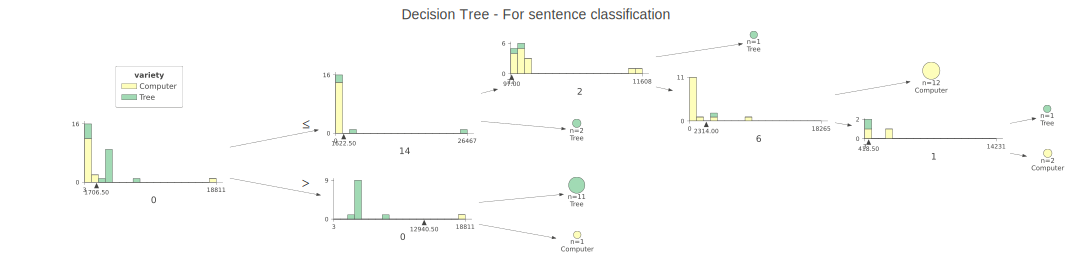

In [ ]:
classifier = tree.DecisionTreeClassifier(max_depth=5)  # limit depth of tree
classifier.fit(updated_sen_tokenized, np.array([0 if i%2 == 0 else 1 for i in range(0, 30)]))
viz = dtreeviz(classifier, 
               updated_sen_tokenized, 
               np.array([0 if i%2 == 0 else 1 for i in range(0, 30)]),
               target_name='variety',
               feature_names=[str(i) for i in range(0, len(updated_sen_tokenized[0]))], 
               class_names=["Computer", "Tree"],  # need class_names for classifier
               scale = 1.0, orientation='LR',
               title="Decision Tree - For sentence classification"
              )  
viz

----------------------------